##### Dataset Link : https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

In [3]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# load dataset
data=pd.read_csv('drive/MyDrive/Research/gene data.csv')
label=pd.read_csv('drive/MyDrive/Research/labels.csv')

In [6]:
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [7]:
data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [9]:
feature_cols=len(data.columns)

In [10]:
data.shape

(801, 20532)

In [11]:
#check any value is null
data.isna().any()

,0
Unnamed: 0,False
gene_0,False
gene_1,False
gene_2,False
gene_3,False
...,...
gene_20526,False
gene_20527,False
gene_20528,False
gene_20529,False


In [12]:
#Checking for duplicates and removing them
data.drop_duplicates(inplace = True)
data.shape

(801, 20532)

In [13]:
label.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [14]:
label.describe()

,Unnamed: 0,Class
count,801,801
unique,801,5
top,sample_800,BRCA
freq,1,300


In [15]:
data["Unnamed: 0"]

,Unnamed: 0
0,sample_0
1,sample_1
2,sample_2
3,sample_3
4,sample_4
...,...
796,sample_796
797,sample_797
798,sample_798
799,sample_799


In [16]:
label['Unnamed: 0']

,Unnamed: 0
0,sample_0
1,sample_1
2,sample_2
3,sample_3
4,sample_4
...,...
796,sample_796
797,sample_797
798,sample_798
799,sample_799


In [17]:
class_labels=label["Class"]
class_labels

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA
...,...
796,BRCA
797,LUAD
798,COAD
799,PRAD


In [18]:
print(class_labels.unique())
print(class_labels.value_counts())

['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']
Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


In [19]:
print("Class: ",len(class_labels.unique()))

Class:  5


<Axes: xlabel='Class'>

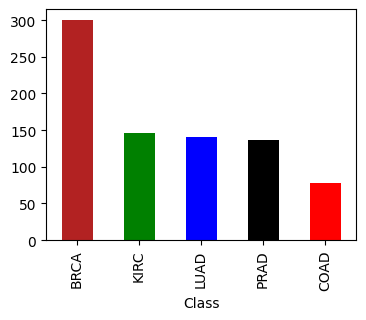

In [20]:
class_labels.value_counts().plot(kind='bar',color=['firebrick', 'green', 'blue', 'black', 'red'], figsize=(4,3))

In [21]:
label = label.replace({'PRAD': 0})
label = label.replace({'LUAD': 1})
label = label.replace({'BRCA': 2})
label = label.replace({'KIRC': 3})
label = label.replace({'COAD': 4})

/tmp/ipython-input-21-1636835807.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  label = label.replace({'COAD': 4})


In [22]:
label.head()

,Unnamed: 0,Class
0,sample_0,0
1,sample_1,1
2,sample_2,0
3,sample_3,0
4,sample_4,2


In [23]:
X=data.iloc[:,1:]
y=label.iloc[:,1:]

In [24]:
X.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [25]:
X.shape

(801, 20531)

In [26]:
y.shape

(801, 1)

In [27]:
y

,Class
0,0
1,1
2,0
3,0
4,2
...,...
796,2
797,1
798,4
799,0


In [28]:
class_labels.shape

(801,)

In [29]:
dataset=pd.concat([X, class_labels], axis=1)

In [30]:
dataset = dataset.set_index('Class').sort_index()

In [31]:
dataset.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,0.0,3.801873,5.025591,6.404150,9.564754,0.0,9.997688,1.025241,0.0,0.0,...,5.919628,8.507347,9.849333,8.184360,9.796564,11.607552,10.456272,9.949412,5.980037,0.000000
BRCA,0.0,3.277330,2.629846,6.000487,9.627027,0.0,8.375748,1.029559,0.0,0.0,...,6.152192,9.015499,10.244994,5.172335,9.788066,11.582057,11.098776,9.909158,5.494595,0.000000
BRCA,0.0,1.149975,0.462576,5.861427,10.092440,0.0,5.445833,1.045932,0.0,0.0,...,6.494526,9.549727,10.037602,6.636375,9.459339,10.109922,10.442394,9.574616,3.541862,0.000000
BRCA,0.0,4.538159,3.955722,6.259862,9.103243,0.0,6.918327,1.162726,0.0,0.0,...,7.102994,9.813018,10.629311,7.128757,10.409104,11.195225,11.169593,10.513451,6.729131,0.270828
BRCA,0.0,2.599770,2.562792,7.365491,10.462155,0.0,7.922370,0.000000,0.0,0.0,...,5.036873,8.267555,9.630254,5.531385,9.241642,11.459872,10.045882,9.091528,9.356654,0.000000


In [32]:
dataset.shape

(801, 20531)

In [33]:
dataset.columns

Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6',
       'gene_7', 'gene_8', 'gene_9',
       ...
       'gene_20521', 'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525',
       'gene_20526', 'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530'],
      dtype='object', length=20531)

In [34]:
len(dataset.columns)

20531

In [35]:
dt=dataset

In [36]:
missing=[]
for i in range(len(dataset.columns)):
    if((dt['gene_'+str(i)]==0).all()):
        missing.append(i)

In [37]:
print(len(missing))

267


In [38]:
for i in range(len(missing)):
    print(missing[i],end=' ')

5 23 4370 4808 4809 4814 4816 4817 4831 5288 7661 7662 7663 7664 7665 8121 9304 9306 9314 9316 9320 9452 10121 11958 13991 14158 14159 14161 15138 15140 15141 15446 16566 16568 16569 16571 16575 16578 16579 16604 16634 16637 16677 16697 16698 16699 16700 16701 16702 16704 16705 16706 16707 16708 16709 16710 16711 16712 16713 16714 16715 16716 16717 16718 16719 16720 16721 16722 16723 16724 16725 16726 16727 16728 16729 16730 16731 16732 16733 16734 16735 16736 16737 16738 16739 16740 16741 16742 16743 16744 16745 16746 16748 16749 16750 16751 16752 16753 16754 16756 16757 16758 16759 16760 16761 16762 16763 16764 16765 16766 16767 16768 16769 16770 16771 16772 16774 16775 16776 16777 16778 16779 16780 16781 16782 16783 16785 16787 16788 16789 16790 16791 16792 16794 16795 16796 16798 16799 16800 16801 16802 16803 16804 16805 16806 16807 16808 16809 16810 16811 16812 16813 16816 16818 16819 16820 16821 16822 16823 16824 16826 16827 16830 16831 16832 16833 16834 16835 16836 16837 16838 1

In [39]:
for i in range(len(missing)):
    X=X.drop(['gene_'+str(missing[i])], axis = 1)

In [40]:
X.shape

(801, 20264)

In [41]:
X.head(3)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,7.175175,0.591871,0.0,0.0,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,6.816049,0.000000,0.0,0.0,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,6.972130,0.452595,0.0,0.0,0.000000,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0


In [42]:
X=pd.DataFrame(X).to_numpy()
y=pd.DataFrame(y).to_numpy()

In [43]:
target=y

In [44]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(target)
onehot_encoder = OneHotEncoder(sparse_output=False, categories='auto')
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
target_encoded = onehot_encoder.fit_transform(integer_encoded)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
target_encoded[0]

array([1., 0., 0., 0., 0.])

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,target_encoded,test_size=0.20,random_state=42,shuffle=True)

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [48]:
X_train[[0]]

array([[-0.18260929,  1.90922841,  0.55666368, ...,  2.56930826,
        -0.08594483, -0.26295175]])

In [49]:
X_train[[0]].shape

(1, 20264)

In [50]:
y_train[[0]]

array([[0., 0., 1., 0., 0.]])

In [51]:
y_train[[0]].argmax(axis=1)

array([2])

## Decision Tree Classification

In [52]:
# Create Decision Tree classifer object
DT = DecisionTreeClassifier(criterion='entropy')
# Train Decision Tree Classifer
DT = DT.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = DT.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy on DT: %.2f" % (accuracy_score(y_test, y_pred)*100),"%")

Accuracy on DT: 98.14 %


In [53]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9643    0.9310    0.9474        29
           1     1.0000    1.0000    1.0000        29
           2     0.9677    0.9836    0.9756        61
           3     1.0000    1.0000    1.0000        25
           4     1.0000    1.0000    1.0000        17

   micro avg     0.9814    0.9814    0.9814       161
   macro avg     0.9864    0.9829    0.9846       161
weighted avg     0.9813    0.9814    0.9813       161
 samples avg     0.9814    0.9814    0.9814       161



In [54]:
from sklearn.model_selection import cross_val_score,cross_val_predict
scross = cross_val_score(DT,X,y, cv = 5)

In [55]:
scross

array([0.9689441, 0.99375  , 0.9625   , 0.975    , 0.95625  ])

In [56]:
np.average(scross)

np.float64(0.9712888198757763)

In [57]:
y_pred = cross_val_predict(DT, X, y, cv = 5)

In [58]:
cm_DT = confusion_matrix(y, y_pred)

In [59]:
cm_DT

array([[131,   1,   4,   0,   0],
       [  1, 132,   7,   0,   1],
       [  5,   3, 291,   0,   1],
       [  0,   2,   1, 143,   0],
       [  0,   0,   0,   0,  78]])

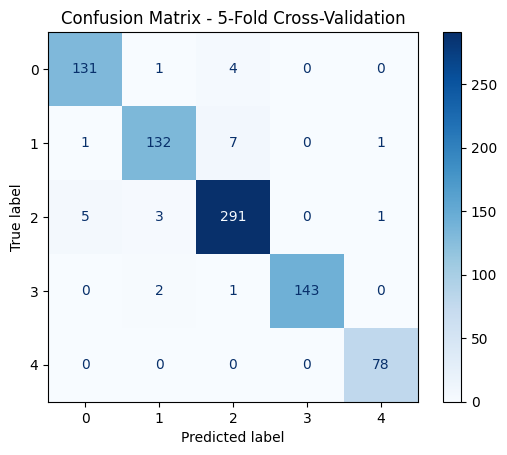

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=np.unique(y_pred))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - 5-Fold Cross-Validation")
plt.show()

In [61]:
print(classification_report(y, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9562    0.9632    0.9597       136
           1     0.9565    0.9362    0.9462       141
           2     0.9604    0.9700    0.9652       300
           3     1.0000    0.9795    0.9896       146
           4     0.9750    1.0000    0.9873        78

    accuracy                         0.9675       801
   macro avg     0.9696    0.9698    0.9696       801
weighted avg     0.9676    0.9675    0.9675       801

